In [48]:
import pandas as pd
import json
import os
import re

In [49]:
pickle_files = [
    "./data/Sonnet-2.pkl",
    "./data/Sonnet-3.5-2.pkl",
    "./data/gpt-4o-2.pkl",
    "./data/gemini-1.5-pro-2.pkl",
]

dfs = [pd.read_pickle(file) for file in pickle_files]
df1 = pd.concat(dfs)

df1["prompt"] = "Which character is being highlighted with a red oval?"


pickle_files = [
    "./data/sonnet.pkl",
    "./data/Sonnet-3.5.pkl",
    "./data/gpt-4o.pkl",
    "./data/gemini-1.5-pro.pkl",
]

dfs = [pd.read_pickle(file) for file in pickle_files]
df2 = pd.concat(dfs)

df2["prompt"] = "Which letter is being circled?"

df = pd.concat([df1, df2])

In [50]:
# conver both gt and predicted to lower case
df["gt"] = df["gt"].apply(lambda x: x.lower())
df["predicted"] = df["predicted"].apply(lambda x: x.lower())
df["is_prediction_correct"] = df["gt"] == df["predicted"]

# Group by model and word, then calculate the accuracy
accuracy_per_model_and_word = df.groupby(["Model", "word"])[
    "is_prediction_correct"
].mean()

# Convert the accuracy to percentage and print the result
accuracy_per_model_and_word = accuracy_per_model_and_word * 100
# round 2 decimal places
accuracy_per_model_and_word = accuracy_per_model_and_word.round(2)

print(accuracy_per_model_and_word)

Model           word                
GPT-4o          Acknowledgement         69.03
                Subdermatoglyphic       63.60
                tHyUiKaRbNqWeOpXcZvM    77.92
Gemini-1.5-Pro  Acknowledgement         97.50
                Subdermatoglyphic       91.05
                tHyUiKaRbNqWeOpXcZvM    89.90
Sonnet          Acknowledgement         81.11
                Subdermatoglyphic       68.26
                tHyUiKaRbNqWeOpXcZvM    61.77
Sonnet-3.5      Acknowledgement         91.11
                Subdermatoglyphic       94.49
                tHyUiKaRbNqWeOpXcZvM    82.08
Name: is_prediction_correct, dtype: float64


In [51]:
# count per model and prompt
df.groupby(["Model", "prompt", "word"]).size()

Model           prompt                                                 word                
GPT-4o          Which character is being highlighted with a red oval?  Acknowledgement         360
                                                                       Subdermatoglyphic       408
                                                                       tHyUiKaRbNqWeOpXcZvM    480
                Which letter is being circled?                         Acknowledgement         360
                                                                       Subdermatoglyphic       408
                                                                       tHyUiKaRbNqWeOpXcZvM    480
Gemini-1.5-Pro  Which character is being highlighted with a red oval?  Acknowledgement         360
                                                                       Subdermatoglyphic       408
                                                                       tHyUiKaRbNqWeOpXcZvM    480
                W

In [52]:
# find missing GPT-4o images

df

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
0,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"The letter ""A"" in the word ""Acknowledgement"" i...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which character is being highlighted with a re...
1,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,50,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"In the image, the letter ""A"" in the word ""Ackn...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which character is being highlighted with a re...
2,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,100,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which character is being highlighted with a re...
3,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,200,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"In the given image, the letter ""A"" in the word...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which character is being highlighted with a re...
4,Acknowledgement,fonts/Helvetica.ttf,0,5,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which character is being highlighted with a re...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,5,1.4,200,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_42f...,The letter **M** is circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which letter is being circled?
1244,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,25,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_141...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which letter is being circled?
1245,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,50,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_8e3...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which letter is being circled?
1246,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,100,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_944...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which letter is being circled?


In [53]:
display(accuracy_per_model_and_word.reset_index())

,Model,word,is_prediction_correct
0,GPT-4o,Acknowledgement,69.03
1,GPT-4o,Subdermatoglyphic,63.60
2,GPT-4o,tHyUiKaRbNqWeOpXcZvM,77.92
3,Gemini-1.5-Pro,Acknowledgement,97.50
4,Gemini-1.5-Pro,Subdermatoglyphic,91.05
5,Gemini-1.5-Pro,tHyUiKaRbNqWeOpXcZvM,89.90
6,Sonnet,Acknowledgement,81.11
7,Sonnet,Subdermatoglyphic,68.26
8,Sonnet,tHyUiKaRbNqWeOpXcZvM,61.77
9,Sonnet-3.5,Acknowledgement,91.11


In [54]:
# average over models
accuracy_per_model_and_word.groupby("Model").mean()

Model
GPT-4o            70.183333
Gemini-1.5-Pro    92.816667
Sonnet            70.380000
Sonnet-3.5        89.226667
Name: is_prediction_correct, dtype: float64

In [55]:
# pivot on word and have different columns for Model and is_prediction_correct
accuracy_per_model_and_word.reset_index().pivot(
    index="word", columns="Model", values="is_prediction_correct"
)

Model,GPT-4o,Gemini-1.5-Pro,Sonnet,Sonnet-3.5
word,,,,
Acknowledgement,69.03,97.50,81.11,91.11
Subdermatoglyphic,63.60,91.05,68.26,94.49
tHyUiKaRbNqWeOpXcZvM,77.92,89.90,61.77,82.08


In [56]:
# conver both gt and predicted to lower case
df["gt"] = df["gt"].apply(lambda x: x.lower())
df["predicted"] = df["predicted"].apply(lambda x: x.lower())
df["is_prediction_correct"] = df["gt"] == df["predicted"]

# Group by model, word, and prompt, then calculate the accuracy
accuracy_per_model_word_prompt = df.groupby(["Model", "word", "prompt"])[
    "is_prediction_correct"
].mean()

# Convert the accuracy to percentage and print the result
accuracy_per_model_word_prompt = accuracy_per_model_word_prompt * 100
# round 2 decimal places
accuracy_per_model_word_prompt = accuracy_per_model_word_prompt.round(2)

display(accuracy_per_model_word_prompt.reset_index())

,Model,word,prompt,is_prediction_correct
0,GPT-4o,Acknowledgement,Which character is being highlighted with a re...,69.17
1,GPT-4o,Acknowledgement,Which letter is being circled?,68.89
2,GPT-4o,Subdermatoglyphic,Which character is being highlighted with a re...,63.24
3,GPT-4o,Subdermatoglyphic,Which letter is being circled?,63.97
4,GPT-4o,tHyUiKaRbNqWeOpXcZvM,Which character is being highlighted with a re...,77.50
5,GPT-4o,tHyUiKaRbNqWeOpXcZvM,Which letter is being circled?,78.33
6,Gemini-1.5-Pro,Acknowledgement,Which character is being highlighted with a re...,96.67
7,Gemini-1.5-Pro,Acknowledgement,Which letter is being circled?,98.33
8,Gemini-1.5-Pro,Subdermatoglyphic,Which character is being highlighted with a re...,90.69
9,Gemini-1.5-Pro,Subdermatoglyphic,Which letter is being circled?,91.42


In [57]:
# calcualte accuracy per model on all words
accuracy_per_model = df.groupby("Model")["is_prediction_correct"].mean()
accuracy_per_model = accuracy_per_model * 100
accuracy_per_model = accuracy_per_model.round(2)
print(accuracy_per_model)

Model
GPT-4o            70.67
Gemini-1.5-Pro    92.47
Sonnet            69.47
Sonnet-3.5        88.74
Name: is_prediction_correct, dtype: float64


In [58]:
print(accuracy_per_model_and_word.to_latex())

\begin{tabular}{llr}
\toprule
 &  & is_prediction_correct \\
Model & word &  \\
\midrule
\multirow[t]{3}{*}{GPT-4o} & Acknowledgement & 69.030000 \\
 & Subdermatoglyphic & 63.600000 \\
 & tHyUiKaRbNqWeOpXcZvM & 77.920000 \\
\cline{1-3}
\multirow[t]{3}{*}{Gemini-1.5-Pro} & Acknowledgement & 97.500000 \\
 & Subdermatoglyphic & 91.050000 \\
 & tHyUiKaRbNqWeOpXcZvM & 89.900000 \\
\cline{1-3}
\multirow[t]{3}{*}{Sonnet} & Acknowledgement & 81.110000 \\
 & Subdermatoglyphic & 68.260000 \\
 & tHyUiKaRbNqWeOpXcZvM & 61.770000 \\
\cline{1-3}
\multirow[t]{3}{*}{Sonnet-3.5} & Acknowledgement & 91.110000 \\
 & Subdermatoglyphic & 94.490000 \\
 & tHyUiKaRbNqWeOpXcZvM & 82.080000 \\
\cline{1-3}
\bottomrule
\end{tabular}



In [59]:
# get average per model
accuracy_per_model_and_word.groupby("Model").mean()

Model
GPT-4o            70.183333
Gemini-1.5-Pro    92.816667
Sonnet            70.380000
Sonnet-3.5        89.226667
Name: is_prediction_correct, dtype: float64

In [60]:
# Assuming 'df' has a column named 'font' that contains the font information for each entry.

# Group by model, word, and font, then calculate the accuracy
accuracy_per_model_word_font = df.groupby(["Model", "word", "font_path"])[
    "is_prediction_correct"
].mean()

# Convert the accuracy to percentage and round to 2 decimal places
accuracy_per_model_word_font = (accuracy_per_model_word_font * 100).round(2)

accuracy_per_model_word_font

Model           word                  font_path                                
GPT-4o          Acknowledgement       fonts/Helvetica.ttf                          69.44
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    68.61
                Subdermatoglyphic     fonts/Helvetica.ttf                          66.42
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    60.78
                tHyUiKaRbNqWeOpXcZvM  fonts/Helvetica.ttf                          81.04
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    74.79
Gemini-1.5-Pro  Acknowledgement       fonts/Helvetica.ttf                          96.67
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    98.33
                Subdermatoglyphic     fonts/Helvetica.ttf                          90.44
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    91.67
                tHyUiKaRbNqWeO

In [61]:
accuracy_per_model_word_prompt.reset_index()

,Model,word,prompt,is_prediction_correct
0,GPT-4o,Acknowledgement,Which character is being highlighted with a re...,69.17
1,GPT-4o,Acknowledgement,Which letter is being circled?,68.89
2,GPT-4o,Subdermatoglyphic,Which character is being highlighted with a re...,63.24
3,GPT-4o,Subdermatoglyphic,Which letter is being circled?,63.97
4,GPT-4o,tHyUiKaRbNqWeOpXcZvM,Which character is being highlighted with a re...,77.50
5,GPT-4o,tHyUiKaRbNqWeOpXcZvM,Which letter is being circled?,78.33
6,Gemini-1.5-Pro,Acknowledgement,Which character is being highlighted with a re...,96.67
7,Gemini-1.5-Pro,Acknowledgement,Which letter is being circled?,98.33
8,Gemini-1.5-Pro,Subdermatoglyphic,Which character is being highlighted with a re...,90.69
9,Gemini-1.5-Pro,Subdermatoglyphic,Which letter is being circled?,91.42


In [62]:
prompt_labels = {
    "Which character is being highlighted with a red oval?": "Prompt 1",
    "Which letter is being circled?": "Prompt 2",
}

# Calculate accuracy and reshape DataFrame
accuracy_per_model_prompt_thickness = df.groupby(["Model", "prompt", "word"])[
    "is_prediction_correct"
].mean()
accuracy_per_model_prompt_thickness = (accuracy_per_model_prompt_thickness * 100).round(
    2
)

# Create a pivot table with models as columns, and line thickness as rows
pivot_df = accuracy_per_model_prompt_thickness.reset_index()
pivot_df["prompt"] = pivot_df["prompt"].map(
    prompt_labels
)  # Map full prompt text to simplified labels
pivot_table = pivot_df.pivot_table(
    index="word", columns=["Model", "prompt"], values="is_prediction_correct"
)

# Display the pivot table
pivot_table

Model                  GPT-4o          Gemini-1.5-Pro            Sonnet  \
prompt               Prompt 1 Prompt 2       Prompt 1 Prompt 2 Prompt 1   
word                                                                      
Acknowledgement         69.17    68.89          96.67    98.33    82.50   
Subdermatoglyphic       63.24    63.97          90.69    91.42    71.32   
tHyUiKaRbNqWeOpXcZvM    77.50    78.33          86.88    92.92    65.83   

Model                         Sonnet-3.5           
prompt               Prompt 2   Prompt 1 Prompt 2  
word                                               
Acknowledgement         79.72      91.39    90.83  
Subdermatoglyphic       65.20      94.36    94.61  
tHyUiKaRbNqWeOpXcZvM    57.71      85.21    78.96

In [63]:
print(pivot_table.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
Model & \multicolumn{2}{r}{GPT-4o} & \multicolumn{2}{r}{Gemini-1.5-Pro} & \multicolumn{2}{r}{Sonnet} & \multicolumn{2}{r}{Sonnet-3.5} \\
prompt & Prompt 1 & Prompt 2 & Prompt 1 & Prompt 2 & Prompt 1 & Prompt 2 & Prompt 1 & Prompt 2 \\
word &  &  &  &  &  &  &  &  \\
\midrule
Acknowledgement & 69.170000 & 68.890000 & 96.670000 & 98.330000 & 82.500000 & 79.720000 & 91.390000 & 90.830000 \\
Subdermatoglyphic & 63.240000 & 63.970000 & 90.690000 & 91.420000 & 71.320000 & 65.200000 & 94.360000 & 94.610000 \\
tHyUiKaRbNqWeOpXcZvM & 77.500000 & 78.330000 & 86.880000 & 92.920000 & 65.830000 & 57.710000 & 85.210000 & 78.960000 \\
\bottomrule
\end{tabular}



# Qualitative Samples

In [15]:
df.columns

Index(['word', 'font_path', 'circle_index', 'thickness', 'scale_factor',
       'padding', 'x_offset', 'y_offset', 'canvas_width', 'canvas_height',
       'final_width', 'final_height', 'image_path', 'model-output-file',
       'model-output-raw', 'predicted', 'gt', 'is_prediction_correct',
       'word_label', 'Model', 'prompt'],
      dtype='object')

Model: Sonnet


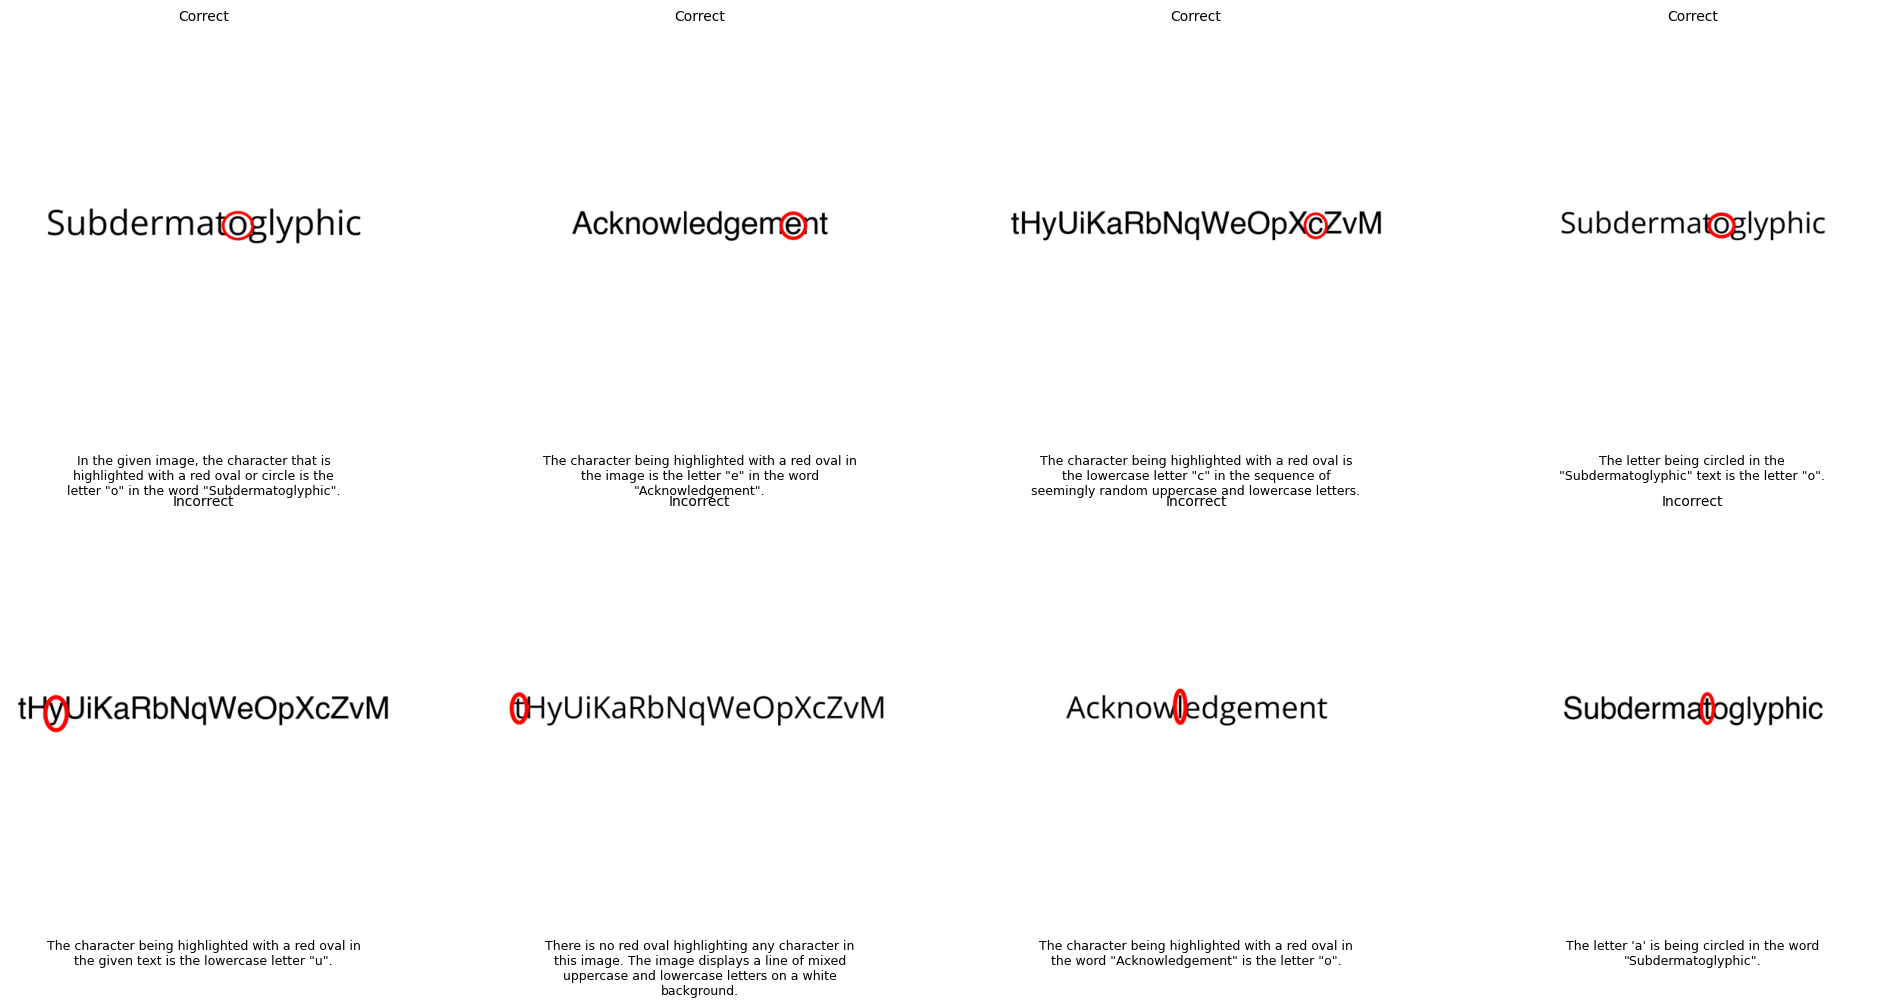

Model: Sonnet-3.5


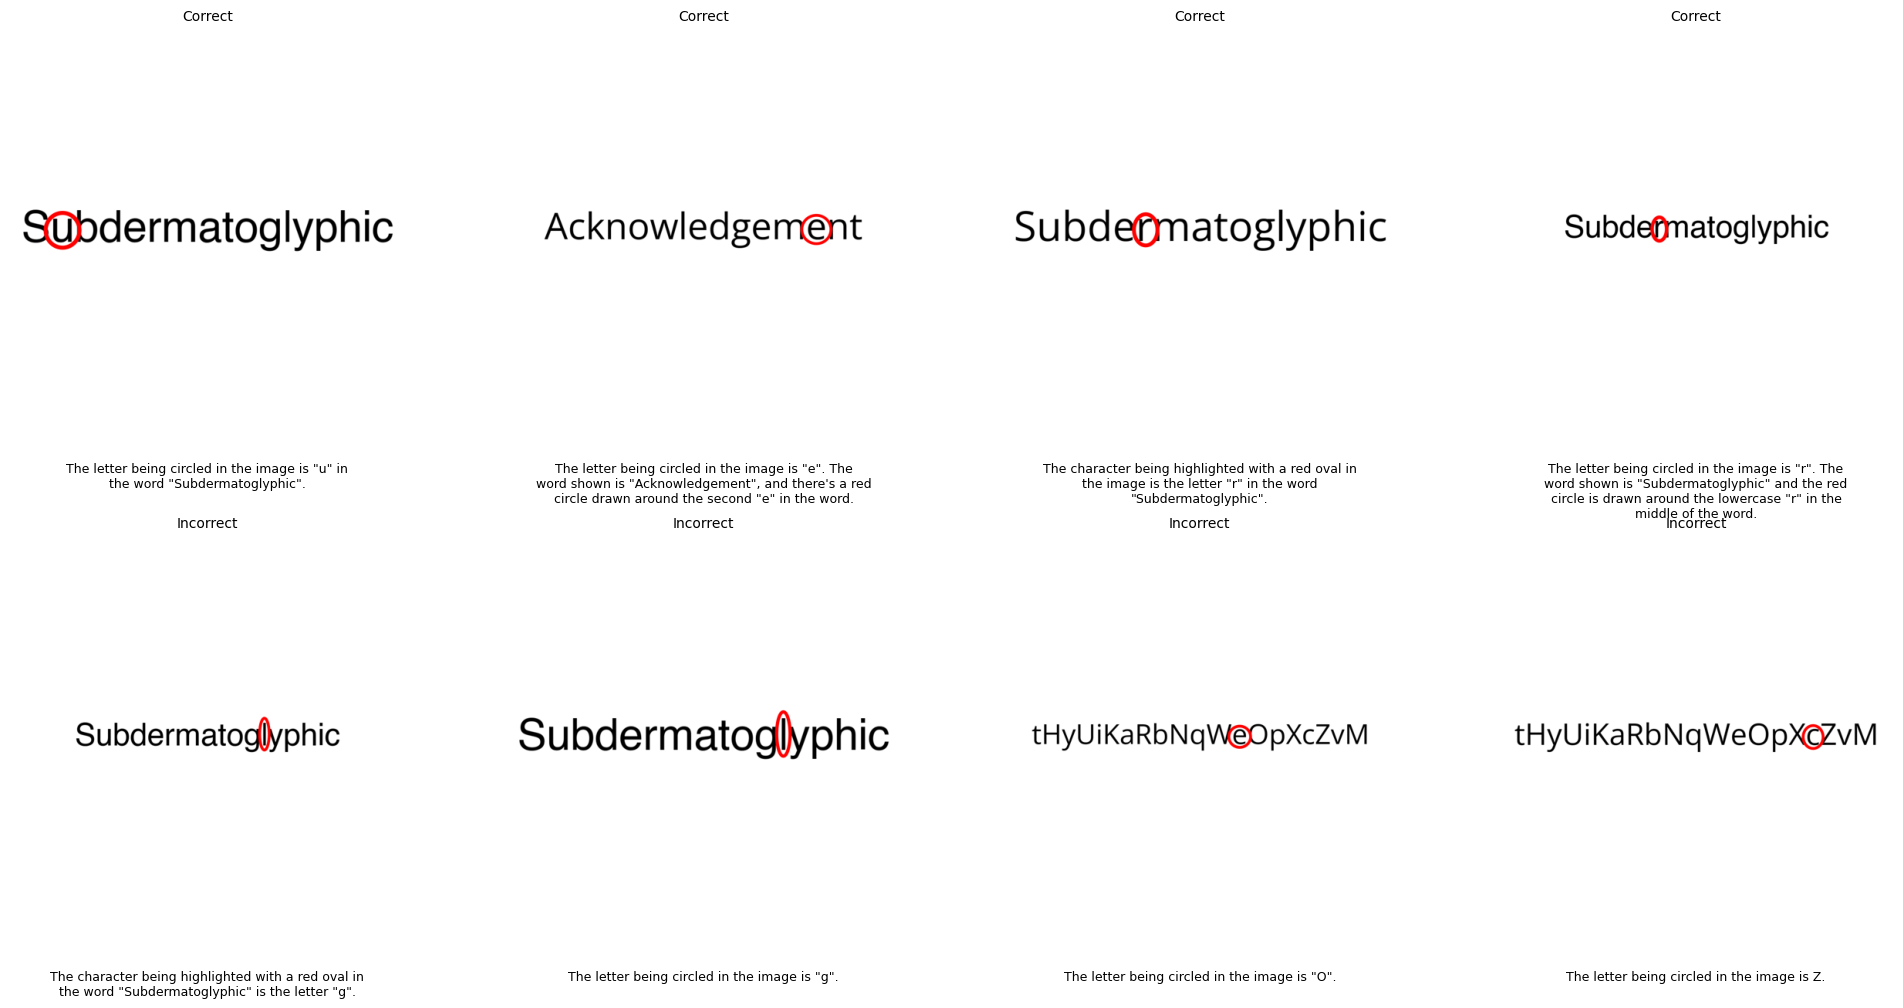

Model: GPT-4o


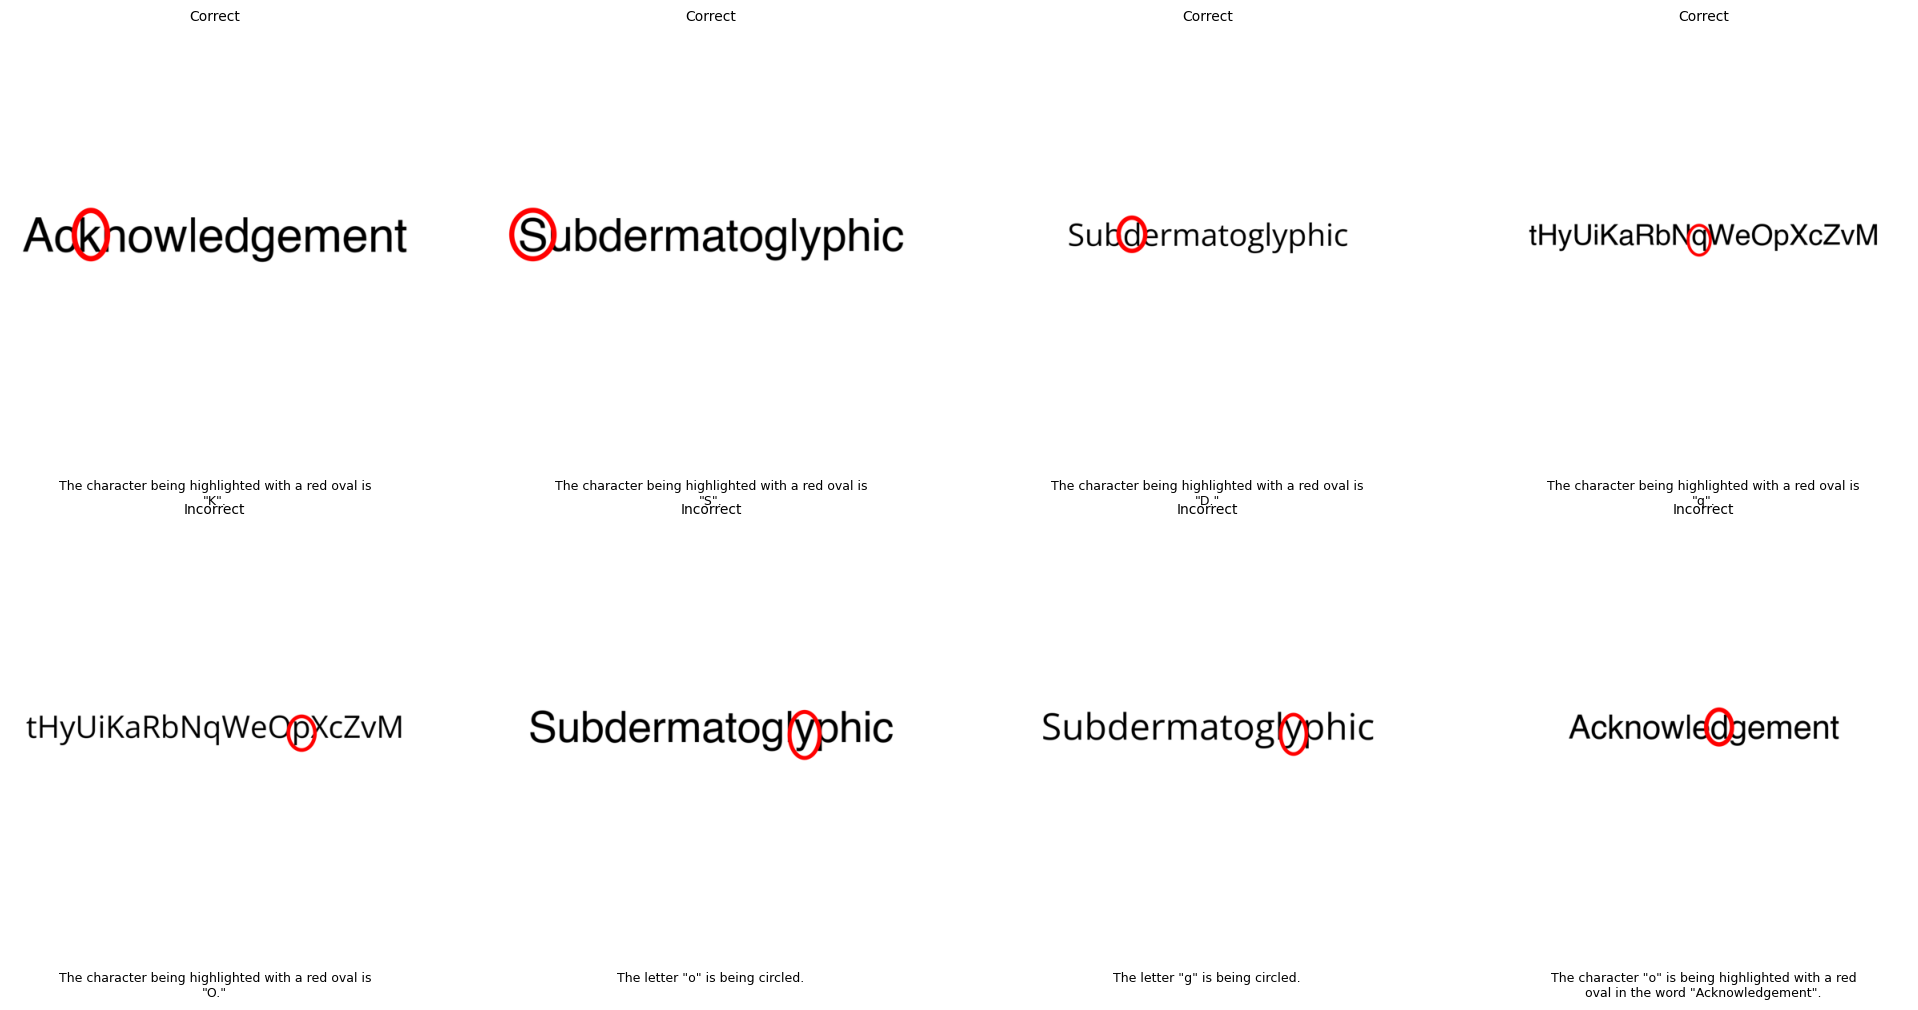

Model: Gemini-1.5-Pro


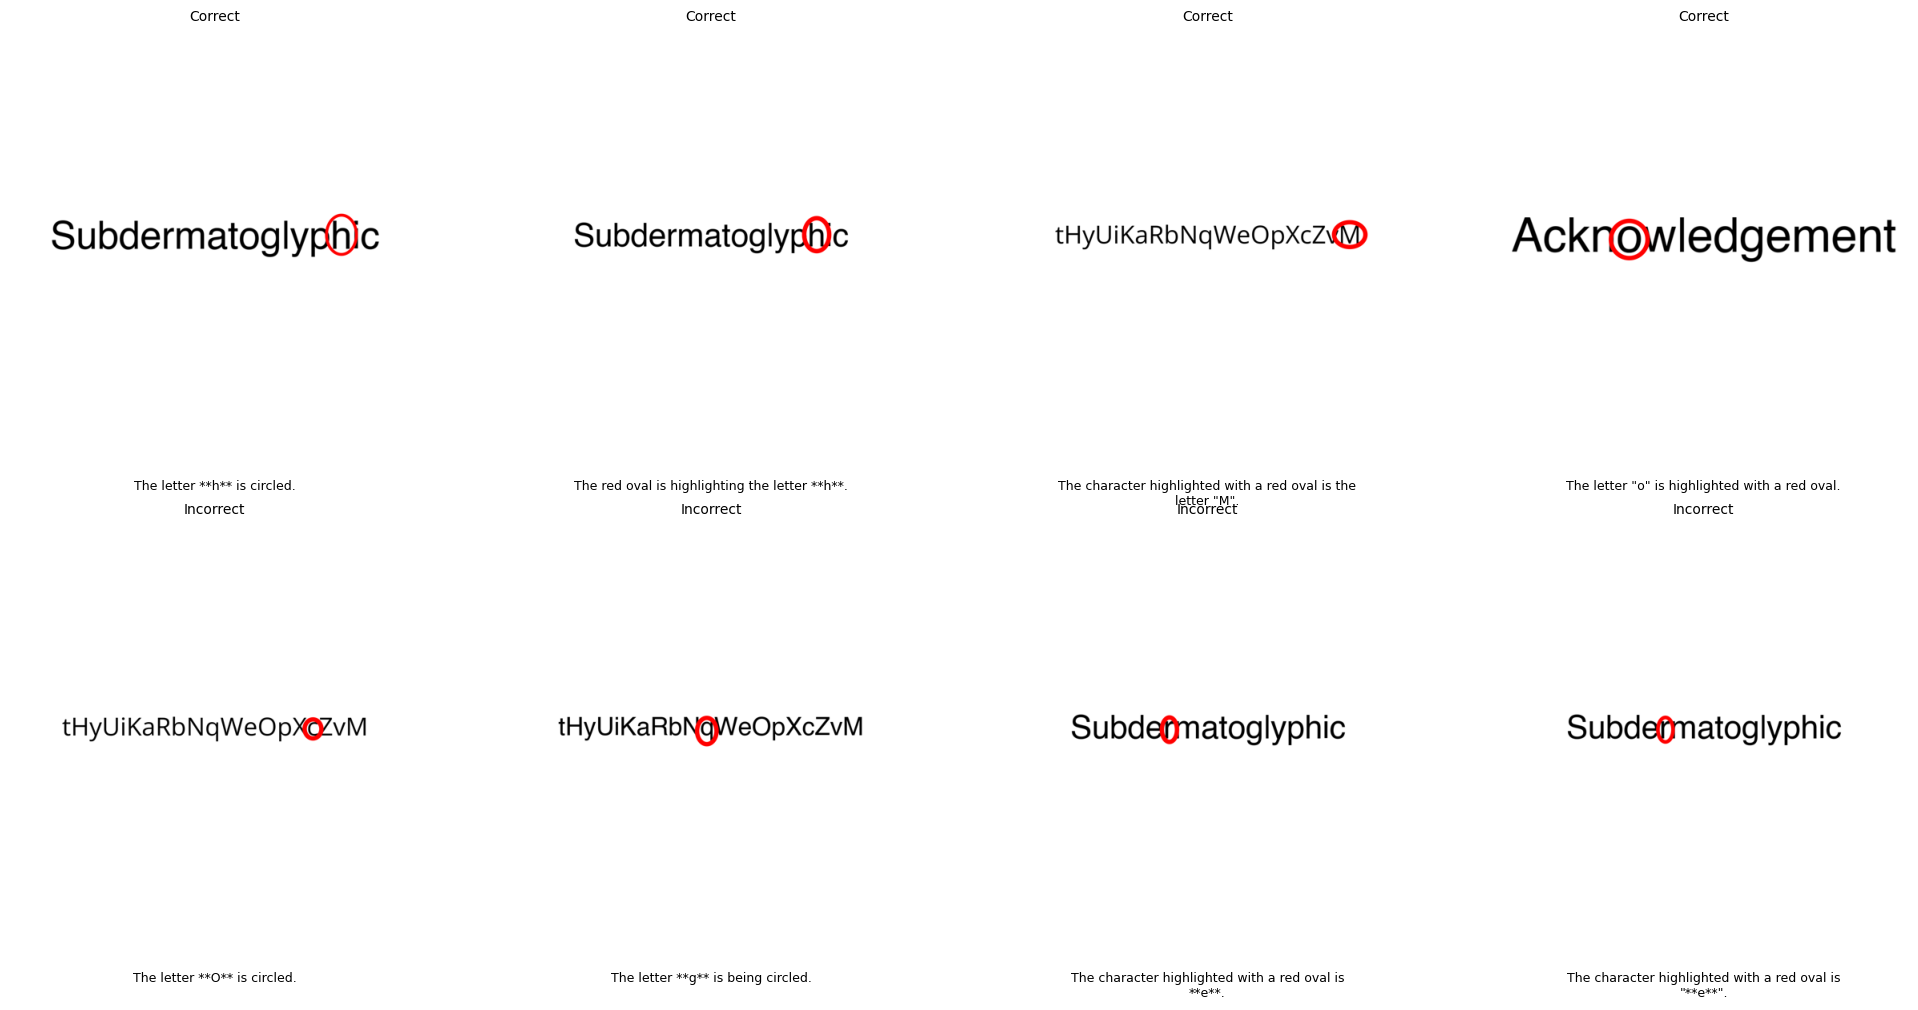

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import textwrap


# Function to display samples of correct and incorrect predictions for each model
def display_model_outputs_with_images(df):
    models = df["Model"].unique()
    for model in models:
        print(f"Model: {model}")
        correct_predictions = df[
            (df["Model"] == model) & (df["is_prediction_correct"] == True)
        ]
        incorrect_predictions = df[
            (df["Model"] == model) & (df["is_prediction_correct"] == False)
        ]

        # Sample 4 correct and 4 incorrect predictions
        sample_correct = correct_predictions.sample(4, random_state=42)
        sample_incorrect = incorrect_predictions.sample(4, random_state=42)

        # Combine samples for display
        samples = pd.concat([sample_correct, sample_incorrect])

        # Setup plot
        _, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
        axs = axs.flatten()  # Flatten to 1D array for easier indexing

        for idx, (ax, (_, row)) in enumerate(zip(axs, samples.iterrows())):
            img_path = f"./{row['image_path']}"
            image = Image.open(img_path)
            ax.imshow(image)
            ax.axis("off")  # Turn off axis
            ax.set_title(
                f"{'Correct' if row['is_prediction_correct'] else 'Incorrect'}",
                fontsize=10,
            )

            # Wrap text to fit under the image
            wrapped_text = textwrap.fill(row["model-output-raw"], width=50)
            ax.text(
                0.5,
                -0.1,
                wrapped_text,
                fontsize=9,
                ha="center",
                va="top",
                transform=ax.transAxes,
            )

        plt.tight_layout()
        plt.show()


# Call the function
display_model_outputs_with_images(df)

# Samples for the paper

In [17]:
df_prompt1 = df[df["prompt"] == "Which character is being highlighted with a red oval?"]
df_prompt2 = df[df["prompt"] == "Which letter is being circled?"]
display(df_prompt1)
display(df_prompt2)

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,final_height,image_path,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,prompt
0,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,25,0,0,10,2,...,512,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,"The letter ""A"" in the word ""Acknowledgement"" i...",a,a,True,Acknowledgement,Sonnet,Which character is being highlighted with a re...
1,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,50,0,0,10,2,...,512,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,"In the image, the letter ""A"" in the word ""Ackn...",a,a,True,Acknowledgement,Sonnet,Which character is being highlighted with a re...
2,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,100,0,0,10,2,...,512,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,a,a,True,Acknowledgement,Sonnet,Which character is being highlighted with a re...
3,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,200,0,0,10,2,...,512,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,"In the given image, the letter ""A"" in the word...",a,a,True,Acknowledgement,Sonnet,Which character is being highlighted with a re...
4,Acknowledgement,fonts/Helvetica.ttf,0,5,1.4,25,0,0,10,2,...,512,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,a,a,True,Acknowledgement,Sonnet,Which character is being highlighted with a re...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,5,1.4,200,0,0,10,2,...,512,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is t...,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which character is being highlighted with a re...
1244,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,25,0,0,10,2,...,512,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted in the red oval is *...,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which character is being highlighted with a re...
1245,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,50,0,0,10,2,...,512,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,"The character highlighted with a red oval is ""...",m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which character is being highlighted with a re...
1246,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,100,0,0,10,2,...,512,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,"The character highlighted with a red oval is ""...",m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which character is being highlighted with a re...


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,final_height,image_path,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,prompt
0,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,25,0,0,10,2,...,512,./images/Acknowledgement/text_image_2445b2a9-9...,./images/Acknowledgement/text_image_2445b2a9-9...,"The letter ""A"" is being circled in the word ""A...",a,a,True,Acknowledgement,Sonnet,Which letter is being circled?
1,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,50,0,0,10,2,...,512,./images/Acknowledgement/text_image_3bac479b-3...,./images/Acknowledgement/text_image_3bac479b-3...,The letter being circled in the image is 'A' w...,a,a,True,Acknowledgement,Sonnet,Which letter is being circled?
2,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,100,0,0,10,2,...,512,./images/Acknowledgement/text_image_7ddbe27c-5...,./images/Acknowledgement/text_image_7ddbe27c-5...,"The letter being circled in the word ""Acknowle...",t,a,False,Acknowledgement,Sonnet,Which letter is being circled?
3,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,200,0,0,10,2,...,512,./images/Acknowledgement/text_image_f22668e3-c...,./images/Acknowledgement/text_image_f22668e3-c...,"The letter 'A' is being circled in the word ""A...",a,a,True,Acknowledgement,Sonnet,Which letter is being circled?
4,Acknowledgement,fonts/Helvetica.ttf,0,5,1.4,25,0,0,10,2,...,512,./images/Acknowledgement/text_image_4181a30f-3...,./images/Acknowledgement/text_image_4181a30f-3...,"The letter being circled in the word ""Acknowle...",t,a,False,Acknowledgement,Sonnet,Which letter is being circled?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,5,1.4,200,0,0,10,2,...,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_42f35...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_42f...,The letter **M** is circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which letter is being circled?
1244,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,25,0,0,10,2,...,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_1418c...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_141...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which letter is being circled?
1245,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,50,0,0,10,2,...,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_8e326...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_8e3...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which letter is being circled?
1246,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,100,0,0,10,2,...,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_94466...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_944...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which letter is being circled?


In [35]:
import os
import pandas as pd
from PIL import Image
import shutil

# predicted	gt


# Function to find and save entries where at least two models failed
def save_failed_model_outputs(df, prompt_id):
    # Group by 'image_name' and filter where at least two 'is_prediction_correct' values are False
    failed_df = df.groupby("image_path").filter(
        lambda x: x["is_prediction_correct"].value_counts().get(False, 0) >= 2
    )
    print(f"Size of failed_df: {len(failed_df)}")
    # Check if there are any entries where at least two models failed
    if not failed_df.empty:
        print("Entries where at least three models failed:")
        display(failed_df)  # Displaying the DataFrame for review

        # group by image_name and show is_prediction_correct value for each model in a separate column (column names should be model names)
        pivoted_df = failed_df.pivot_table(
            index="image_path", columns="Model", values="is_prediction_correct", aggfunc="first"
        )

        # Display the pivoted DataFrame
        display(pivoted_df)

        # Create a directory for saving the images
        base_dir = "./qualitative"
        if not os.path.exists(base_dir):
            os.makedirs(base_dir)

        # Save images with new naming convention
        for image_name, group in failed_df.groupby("image_path"):
            details = [
                f"gt_{group.iloc[0]['gt']}"
            ]  # Start with ground truth label
            for _, row in group.iterrows():
                details.append(f"{row['Model']}_{row['predicted']}")

            image_name_short = os.path.basename(image_name).replace(".png", "")

            detailed_filename = (
                "_".join(details) + "_" + image_name_short + "_prompt" + prompt_id + ".png"
            )
            img_path = f"./{image_name}"
            new_filename = detailed_filename

            shutil.copy(img_path, os.path.join(base_dir, new_filename))

    else:
        print("No entries found where at least two models failed.")



In [36]:

# Call the function
save_failed_model_outputs(df_prompt1, "1")

Size of failed_df: 264
Entries where at least three models failed:


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,final_height,image_path,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,prompt
140,Acknowledgement,fonts/Helvetica.ttf,11,6,1.4,25,0,0,10,2,...,512,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,e,m,False,Acknowledgement,Sonnet,Which character is being highlighted with a re...
156,Acknowledgement,fonts/Helvetica.ttf,13,4,1.4,25,0,0,10,2,...,512,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,g,n,False,Acknowledgement,Sonnet,Which character is being highlighted with a re...
160,Acknowledgement,fonts/Helvetica.ttf,13,5,1.4,25,0,0,10,2,...,512,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,e,n,False,Acknowledgement,Sonnet,Which character is being highlighted with a re...
163,Acknowledgement,fonts/Helvetica.ttf,13,5,1.4,200,0,0,10,2,...,512,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,"In the given image, the character being highli...",e,n,False,Acknowledgement,Sonnet,Which character is being highlighted with a re...
164,Acknowledgement,fonts/Helvetica.ttf,13,6,1.4,25,0,0,10,2,...,512,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,e,n,False,Acknowledgement,Sonnet,Which character is being highlighted with a re...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,50,0,0,10,2,...,512,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,c,c,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which character is being highlighted with a re...
1210,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,100,0,0,10,2,...,512,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,o,c,False,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which character is being highlighted with a re...
1211,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,200,0,0,10,2,...,512,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,o,c,False,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which character is being highlighted with a re...
1223,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",17,6,1.4,200,0,0,10,2,...,512,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,v,z,False,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which character is being highlighted with a re...


Model,Gemini-1.5-Pro,Sonnet,Sonnet-3.5
image_path,,,
./images_second_prompt/Acknowledgement/text_image_240d523e-6d63-4067-86dc-142aa5fffd23.png,True,False,False
./images_second_prompt/Acknowledgement/text_image_2ffcf634-2773-40a8-a7dc-072a26890b6a.png,True,False,False
./images_second_prompt/Acknowledgement/text_image_329ab766-4a3b-471b-bde2-9539e57a220a.png,True,False,False
./images_second_prompt/Acknowledgement/text_image_9aee8a16-b2d7-4db5-af59-3a6f24df02b1.png,True,False,False
./images_second_prompt/Acknowledgement/text_image_a21e1f79-ba03-4919-a13a-e4bb837d82d2.png,False,False,True
...,...,...,...
./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/text_image_f5de57dc-ee13-4278-b1dc-3ace9b19028a.png,True,False,False
./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/text_image_f6838de6-610e-4dc5-a58a-237552c2b5e8.png,True,False,False
./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/text_image_f80e51dc-496d-4036-9295-b29f60f7d715.png,False,True,False


In [34]:
save_failed_model_outputs(df_prompt2, "2")


Size of failed_df: 1119
Entries where at least three models failed:


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,final_height,image_path,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,prompt
27,Acknowledgement,fonts/Helvetica.ttf,2,4,1.4,200,0,0,10,2,...,512,./images/Acknowledgement/text_image_20e95f00-f...,./images/Acknowledgement/text_image_20e95f00-f...,"The letter ""c"" in the word ""Acknowledgement"" i...",c,k,False,Acknowledgement,Sonnet,Which letter is being circled?
36,Acknowledgement,fonts/Helvetica.ttf,3,4,1.4,25,0,0,10,2,...,512,./images/Acknowledgement/text_image_e1e87407-0...,./images/Acknowledgement/text_image_e1e87407-0...,"The letter being circled in the word ""Acknowle...",t,n,False,Acknowledgement,Sonnet,Which letter is being circled?
72,Acknowledgement,fonts/Helvetica.ttf,6,4,1.4,25,0,0,10,2,...,512,./images/Acknowledgement/text_image_2c6f9384-4...,./images/Acknowledgement/text_image_2c6f9384-4...,"The letter 'I' is being circled in the word ""A...",i,l,False,Acknowledgement,Sonnet,Which letter is being circled?
78,Acknowledgement,fonts/Helvetica.ttf,6,5,1.4,100,0,0,10,2,...,512,./images/Acknowledgement/text_image_9486e45b-2...,./images/Acknowledgement/text_image_9486e45b-2...,The letter being circled or highlighted in the...,o,l,False,Acknowledgement,Sonnet,Which letter is being circled?
80,Acknowledgement,fonts/Helvetica.ttf,6,6,1.4,25,0,0,10,2,...,512,./images/Acknowledgement/text_image_21854a1c-8...,./images/Acknowledgement/text_image_21854a1c-8...,"The letter that is being circled in the word ""...",l,l,True,Acknowledgement,Sonnet,Which letter is being circled?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",18,5,1.4,25,0,0,10,2,...,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_ad3b6...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_ad3...,The letter **V** is circled. \n,v,v,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which letter is being circled?
1229,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",18,5,1.4,50,0,0,10,2,...,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_35bc4...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_35b...,The letter **V** is being circled. \n,v,v,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which letter is being circled?
1231,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",18,5,1.4,200,0,0,10,2,...,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_dbeaa...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_dbe...,The letter **V** is circled. \n,v,v,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which letter is being circled?
1232,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",18,6,1.4,25,0,0,10,2,...,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_e6bad...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_e6b...,The letter **V** is being circled. \n,v,v,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,Which letter is being circled?


Model,GPT-4o,Gemini-1.5-Pro,Sonnet,Sonnet-3.5
image_path,,,,
./images/Acknowledgement/text_image_040f7cb9-681c-4e3f-9fb2-f9a23fc7ca3a.png,False,True,False,False
./images/Acknowledgement/text_image_04dd2463-840c-413c-8551-a0dcf6d89ac7.png,False,True,False,False
./images/Acknowledgement/text_image_1834e964-d033-4b77-a592-59c4fb7fda96.png,False,True,True,False
./images/Acknowledgement/text_image_20e95f00-fe8e-4267-9c68-67f985ed6808.png,False,True,False,True
./images/Acknowledgement/text_image_21854a1c-8eda-478a-9aec-e017dc044858.png,False,False,True,True
...,...,...,...,...
./images/tHyUiKaRbNqWeOpXcZvM/text_image_f077ec6c-b9d4-49d4-a873-e84bc3618f04.png,False,True,False,False
./images/tHyUiKaRbNqWeOpXcZvM/text_image_f33874a4-3e40-49c9-bd53-c6cd6d3923f2.png,False,False,True,True
./images/tHyUiKaRbNqWeOpXcZvM/text_image_f5de57dc-ee13-4278-b1dc-3ace9b19028a.png,False,True,False,False
